In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2

In [2]:
from experiments.pretraining_vs_finetuning.minibertas.miniberta_result_buckets import (
    roberta_1M, 
    roberta_10M,
    roberta_100M,
    roberta_1B,
    roberta_base
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 33705.43it/s]


Text(0, 0.5, 'Corrected P(STAY)')

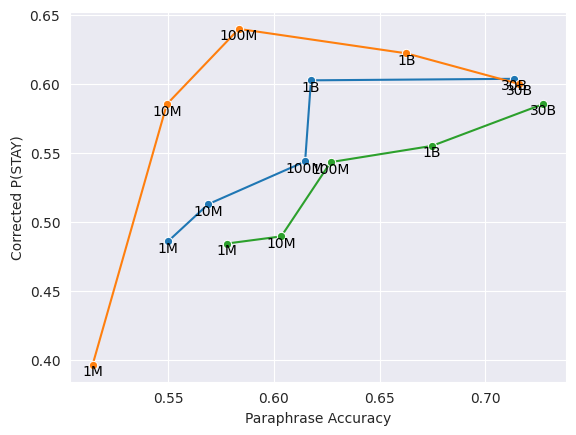

In [3]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

def plot_pretraining_trend(dataset):
    x = []
    y = []
    for size in [roberta_1M, roberta_10M, roberta_100M, roberta_1B, roberta_base]:
        summary = size[f'{dataset}-human'].linguistic_robustness_summary(size[f'{dataset}-test'])
        x.append(summary['paraphrase_accuracy_corrected']) #size['snli-test'].accuracy)
        y.append(summary['pove_corrected'])
    
    sns.lineplot(x=x, y=y, marker='o', legend=True)
    for i, words in enumerate(['1M', '10M', '100M', '1B', '30B']):
        plt.text(x[i], y[i]-0.005, words, fontsize=10, ha='center', va='center', color='black')

plot_pretraining_trend('snli')
plot_pretraining_trend('atomic')
plot_pretraining_trend('social')

ax = plt.gca()
ax.set_xlabel("Paraphrase Accuracy")
ax.set_ylabel("Corrected P(STAY)")

# add the bowl?
# POVE?

In [ ]:
# isocurves corresponding to different POVEs